# Part 1: Matplotlib
## 1.

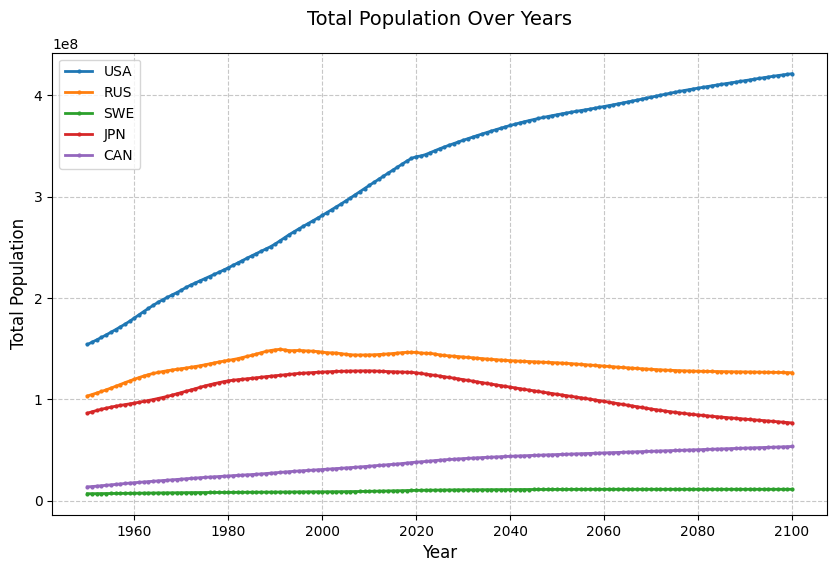

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# import data
df_usa = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-usa--age--gender--year.csv')
df_rus = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-rus--age--gender--year.csv')
df_swe = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-swe--age--gender--year.csv')
df_jpn = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-jpn--age--gender--year.csv')
df_can = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-can--age--gender--year.csv')

# yearly sum for countries
yearly_total_usa = pd.DataFrame(df_usa.groupby('year')['population'].sum())
yearly_total_rus = pd.DataFrame(df_rus.groupby('year')['population'].sum())
yearly_total_swe = pd.DataFrame(df_swe.groupby('year')['population'].sum())
yearly_total_jpn = pd.DataFrame(df_jpn.groupby('year')['population'].sum())
yearly_total_can = pd.DataFrame(df_can.groupby('year')['population'].sum())

plt.figure(figsize=(10, 6))
plt.plot(yearly_total_usa.index, yearly_total_usa['population'], 
         marker='o', linestyle='-',
         linewidth=2, markersize=2, label='USA')
plt.plot(yearly_total_rus.index, yearly_total_rus['population'], 
         marker='o', linestyle='-',
         linewidth=2, markersize=2, label='RUS')
plt.plot(yearly_total_swe.index, yearly_total_swe['population'], 
         marker='o', linestyle='-',
         linewidth=2, markersize=2, label='SWE')
plt.plot(yearly_total_jpn.index, yearly_total_jpn['population'], 
         marker='o', linestyle='-',
         linewidth=2, markersize=2, label='JPN')
plt.plot(yearly_total_can.index, yearly_total_can['population'], 
         marker='o', linestyle='-', 
         linewidth=2, markersize=2, label='CAN')
plt.cm.Set2
plt.title('Total Population Over Years', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Population', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

## 2.

<function matplotlib.pyplot.show(close=None, block=None)>

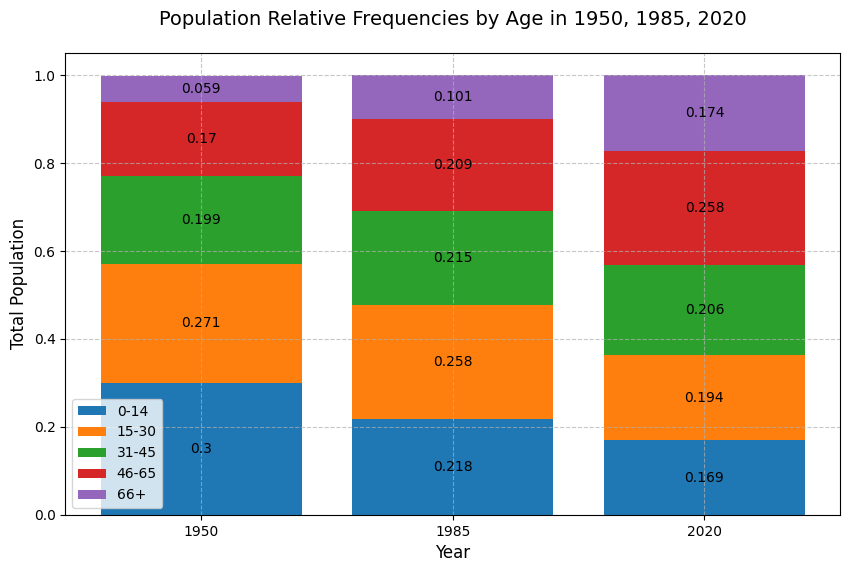

In [21]:
# combine country dfs
df_all = pd.concat([df_usa, df_rus, df_swe, df_jpn, df_can])

# select rows by age and sum based on year, select only years 1950, 1985, 2020
age_ranges = [range(0,15), range(15,31), range(31,46), range(46,66), range(66,150)]
df_0_14 = df_all[df_all['age'].isin(age_ranges[0])]
df_0_14 = pd.DataFrame(df_0_14.groupby('year')['population'].sum(), index=[1950,1985,2020])
df_15_30 = df_all[df_all['age'].isin(age_ranges[1])]
df_15_30 = pd.DataFrame(df_15_30.groupby('year')['population'].sum(), index=[1950,1985,2020])
df_31_45 = df_all[df_all['age'].isin(age_ranges[2])]
df_31_45 = pd.DataFrame(df_31_45.groupby('year')['population'].sum(), index=[1950,1985,2020])
df_46_65 = df_all[df_all['age'].isin(age_ranges[3])]
df_46_65 = pd.DataFrame(df_46_65.groupby('year')['population'].sum(), index=[1950,1985,2020])
df_66_ = df_all[df_all['age'].isin(age_ranges[4])]
df_66_ = pd.DataFrame(df_66_.groupby('year')['population'].sum(), index=[1950,1985,2020])
df_totals = pd.DataFrame(df_all.groupby('year')['population'].sum(), index=[1950,1985,2020])

# convert the population values to lists
x = ['1950', '1985', '2020']
y1 = df_0_14['population'].tolist()
y2 = df_15_30['population'].tolist()
y3 = df_31_45['population'].tolist()
y4 = df_46_65['population'].tolist()
y5 = df_66_['population'].tolist()
totals = df_totals['population'].tolist()

# convert populations to proportion of total for the year
y_list = [y1,y2,y3,y4,y5]
# for each of the five lists...
for i in range(len(y_list)):
    # ...for each of the three values...
    current = y_list[i]
    for j in range(len(current)):
        # ...divide by the total population of that year
        current[j] = current[j]/totals[j]
    y_list[i] = current

# make rounded lists for display on bar chart
y_rounded = []
for i in range(len(y_list)):
    # ...for each of the three values...
    current = y_list[i]
    for j in range(len(current)):
        # ...divide by the total population of that year
        current[j] = round(current[j],3)
    y_rounded.append(current)

plt.figure(figsize=(10, 6))
# set up list to iterate for position of bottom of bars
y_bottom = [0,0,0]
for i in range(len(y_list)):
    current_y = y_list[i]
    plt.bar_label(plt.bar(x = x, height = current_y, bottom = y_bottom, width=0.8), label_type = 'center', labels = y_rounded[i])
    # add heights to bottom for next y_list
    for j in range(len(current_y)):
        y_bottom[j] += current_y[j]
plt.cm.Set2
plt.legend(['0-14','15-30','31-45','46-65','66+'])
plt.title('Population Relative Frequencies by Age in 1950, 1985, 2020', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Population', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout
plt.show

In [ ]:

df.plot.bar(x = 'year', stacked = True)

to do: add labels for bar sections